# wine-reviews

Use the "Run" button to execute the code.

In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
import jovian

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="wine-reviews-data-analysis")

<IPython.core.display.Javascript object>

In [28]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

Analysis

In [72]:
data_csv = pd.read_csv("winemag-data-130k-v2.csv")
data_csv.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [73]:
data = pd.DataFrame(data_csv)
data = data_csv[["country", "points", "price", "province", "taster_name", "variety", "winery"]]
display (data[:10])


,country,points,price,province,taster_name,variety,winery
0,Italy,87,NaN,Sicily & Sardinia,Kerin O’Keefe,White Blend,Nicosia
1,Portugal,87,15.0,Douro,Roger Voss,Portuguese Red,Quinta dos Avidagos
2,US,87,14.0,Oregon,Paul Gregutt,Pinot Gris,Rainstorm
3,US,87,13.0,Michigan,Alexander Peartree,Riesling,St. Julian
4,US,87,65.0,Oregon,Paul Gregutt,Pinot Noir,Sweet Cheeks
5,Spain,87,15.0,Northern Spain,Michael Schachner,Tempranillo-Merlot,Tandem
6,Italy,87,16.0,Sicily & Sardinia,Kerin O’Keefe,Frappato,Terre di Giurfo
7,France,87,24.0,Alsace,Roger Voss,Gewürztraminer,Trimbach
8,Germany,87,12.0,Rheinhessen,Anna Lee C. Iijima,Gewürztraminer,Heinz Eifel
9,France,87,27.0,Alsace,Roger Voss,Pinot Gris,Jean-Baptiste Adam


In [30]:
len(data)

129971

In [48]:
data["points"].min()
data["points"].max()
data["points"].mean()

88.44713820775404

Text(0, 0.5, 'price')

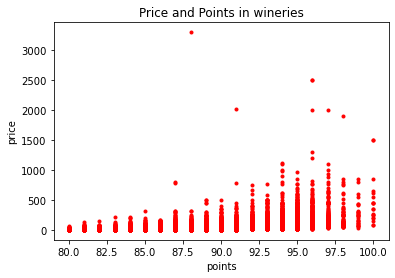

In [70]:
points = data["points"]
price = data["price"]
plt.plot(points, price, "r.")
plt.title("Price and Points in wineries")
plt.xlabel("points")
plt.ylabel("price")

In [42]:
countries = data[ ["country", "winery"] ].groupby(by="country").count().sort_values(by="winery")
print(countries)

                        winery
country                       
China                        1
Slovakia                     1
Egypt                        1
Armenia                      2
Bosnia and Herzegovina       2
Luxembourg                   6
Switzerland                  7
India                        9
Cyprus                      11
Czech Republic              12
Serbia                      12
Macedonia                   12
Ukraine                     14
Peru                        16
Morocco                     28
Lebanon                     35
Brazil                      52
Moldova                     59
Mexico                      70
Croatia                     73
England                     74
Georgia                     86
Slovenia                    87
Turkey                      90
Uruguay                    109
Romania                    120
Bulgaria                   141
Hungary                    146
Canada                     257
Greece                     466
Israel  

In [65]:
countries = data[ ["points", "province"] ].groupby(by="province").mean().sort_values(by="points")[::-1]
print(countries)

                              points
province                            
Südburgenland              94.000000
Madeira                    93.230769
Mittelrhein                92.000000
Puente Alto                91.733333
Wachau                     91.620397
...                              ...
Iowa                       83.000000
Ticino                     83.000000
Serra do Sudeste           82.000000
Middle and South Dalmatia  82.000000
Table wine                 81.000000

[425 rows x 1 columns]
